# Potato Disease Classification

Dataset can be found in the following url - https://data.mendeley.com/datasets/tywbtsjrjv/1

### Import all the Dependencies

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
train_dir = "/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/train"
valid_dir = "/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/val"
test_dir = "/content/gdrive/MyDrive/ColabNotebooks/Pictures/potato_dataset_new/test"

In [5]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(256, 256, 3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
], name ="data_augmentation")

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 2100 images belonging to 3 classes.


In [7]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        valid_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 300 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        shuffle=False
)

Found 600 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.53899014 0.52722543 0.5703627 ]
  [0.5241724  0.5124077  0.555545  ]
  [0.5093547  0.49758998 0.54072726]
  ...
  [0.6931888  0.6853456  0.7284829 ]
  [0.68932545 0.6814823  0.72461957]
  [0.6854622  0.67761904 0.7207563 ]]

 [[0.56296456 0.55119985 0.5943371 ]
  [0.56161755 0.54985285 0.5929901 ]
  [0.5602704  0.5485057  0.59164304]
  ...
  [0.6925152  0.68467206 0.7278093 ]
  [0.6886519  0.6808088  0.72394603]
  [0.68478864 0.6769455  0.72008276]]

 [[0.58864695 0.57688224 0.6200195 ]
  [0.5832587  0.571494   0.61463124]
  [0.5778704  0.5661057  0.609243  ]
  ...
  [0.69184166 0.6839985  0.7271358 ]
  [0.6879784  0.68013525 0.7232725 ]
  [0.6841151  0.676272   0.7194092 ]]

 ...

 [[0.4806428  0.48848593 0.5394663 ]
  [0.46937087 0.477214   0.5281944 ]
  [0.52689004 0.5347332  0.58571357]
  ...
  [0.6006305  0.5927873  0.64768934]
  [0.5992834  0.59144026 0.6463422 ]
  [0.59793633 0.5900932  0.64499515]]

 [[0.46649858 0.47434172 0.52532214]
  [0.48284155 0.4906847  0.5416651 ]


In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3
model=models.Sequential([layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.5),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(32, activation ='relu'),
        layers.Dense(n_classes, activation='softmax')])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)        0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
66/66 [==============================] - 904s 13s/step - loss: 1.0167 - accuracy: 0.4229 - val_loss: 0.8897 - val_accuracy: 0.5833
Epoch 2/30
66/66 [==============================] - 44s 671ms/step - loss: 0.4700 - accuracy: 0.8005 - val_loss: 0.3495 - val_accuracy: 0.8367
Epoch 3/30
66/66 [==============================] - 45s 675ms/step - loss: 0.2586 - accuracy: 0.9048 - val_loss: 0.3536 - val_accuracy: 0.8633
Epoch 4/30
66/66 [==============================] - 45s 681ms/step - loss: 0.2259 - accuracy: 0.9129 - val_loss: 0.2347 - val_accuracy: 0.9233
Epoch 5/30
66/66 [==============================] - 46s 692ms/step - loss: 0.1828 - accuracy: 0.9286 - val_loss: 0.2286 - val_accuracy: 0.9267
Epoch 6/30
66/66 [==============================] - 45s 675ms/step - loss: 0.1555 - accuracy: 0.9452 - val_loss: 0.1711 - val_accuracy: 0.9333
Epoch 7/30
66/66 [==============================] - 44s 667ms/step - loss: 0.1506 - accuracy: 0.9405 - val_loss: 0.2042 - val_accuracy: 0.9333


In [ ]:
scores = model.evaluate(test_generator)

19/19 [==============================] - 166s 9s/step - loss: 0.1280 - accuracy: 0.9667


In [ ]:
scores

[0.1279810667037964, 0.9666666388511658]

### Plotting the Accuracy and Loss Curves

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 66}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['loss'])

17

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.0166504383087158,
 0.4699864089488983,
 0.2586178481578827,
 0.22592885792255402,
 0.18278177082538605]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_acc

[0.5833333134651184,
 0.8366666436195374,
 0.8633333444595337,
 0.9233333468437195,
 0.9266666769981384,
 0.9333333373069763,
 0.9333333373069763,
 0.9633333086967468,
 0.949999988079071,
 0.9266666769981384,
 0.9233333468437195,
 0.9700000286102295,
 0.9766666889190674,
 0.9766666889190674,
 0.9300000071525574,
 0.9566666483879089,
 0.9433333277702332]

In [ ]:
acc

[0.4228571355342865,
 0.8004761934280396,
 0.9047619104385376,
 0.9128571152687073,
 0.9285714030265808,
 0.9452381134033203,
 0.9404761791229248,
 0.9466666579246521,
 0.9523809552192688,
 0.9609524011611938,
 0.9709523916244507,
 0.9747619032859802,
 0.9747619032859802,
 0.977142870426178,
 0.9800000190734863,
 0.9609524011611938,
 0.9695237874984741]

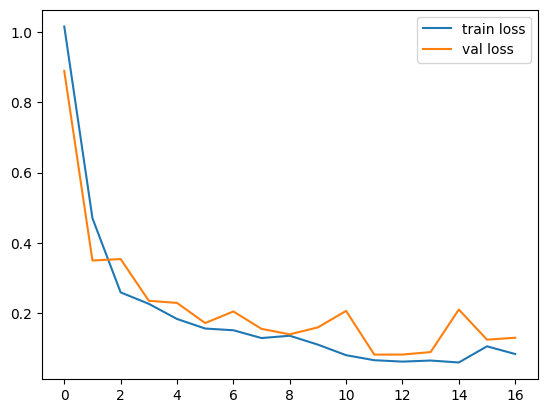

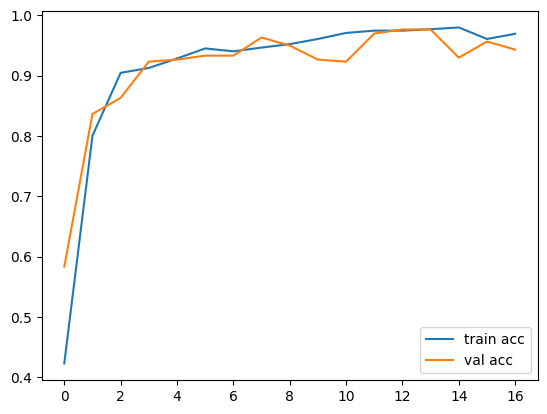

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_CNN')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_CNN')

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [15]:
model=load_model('/content/gdrive/MyDrive/ColabNotebooks/final_cnn_model_potato_disease.h5')

In [31]:

y_pred = model.predict(test_generator)


19/19 [==============================] - 14s 719ms/step


In [21]:
import numpy as np
y_pred = np.argmax(y_pred1, axis=1)

In [22]:
y_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Write a function for inference

In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
def returnIndex(labels):
  for i in range(len(labels)):
      if(labels[i]==1):
        return i

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

Output hidden; open in https://colab.research.google.com to view.

### Saving the Model



In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('final_cnn_model_potato_disease.h5')
model.save('/content/gdrive/MyDrive/ColabNotebooks/final_cnn_model_potato_disease.h5')

<ipython-input-38-4c32fa3ecfe5>:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Confusion Matrix
Normalized confusion matrix
Classification Report
                       precision    recall  f1-score   support

Potato___Early_blight       1.00      0.92      0.96       200
 Potato___Late_blight       0.91      0.99      0.95       200
     Potato___healthy       0.99      0.98      0.99       200

             accuracy                           0.96       600
            macro avg       0.97      0.96      0.97       600
         weighted avg       0.97      0.96      0.97       600



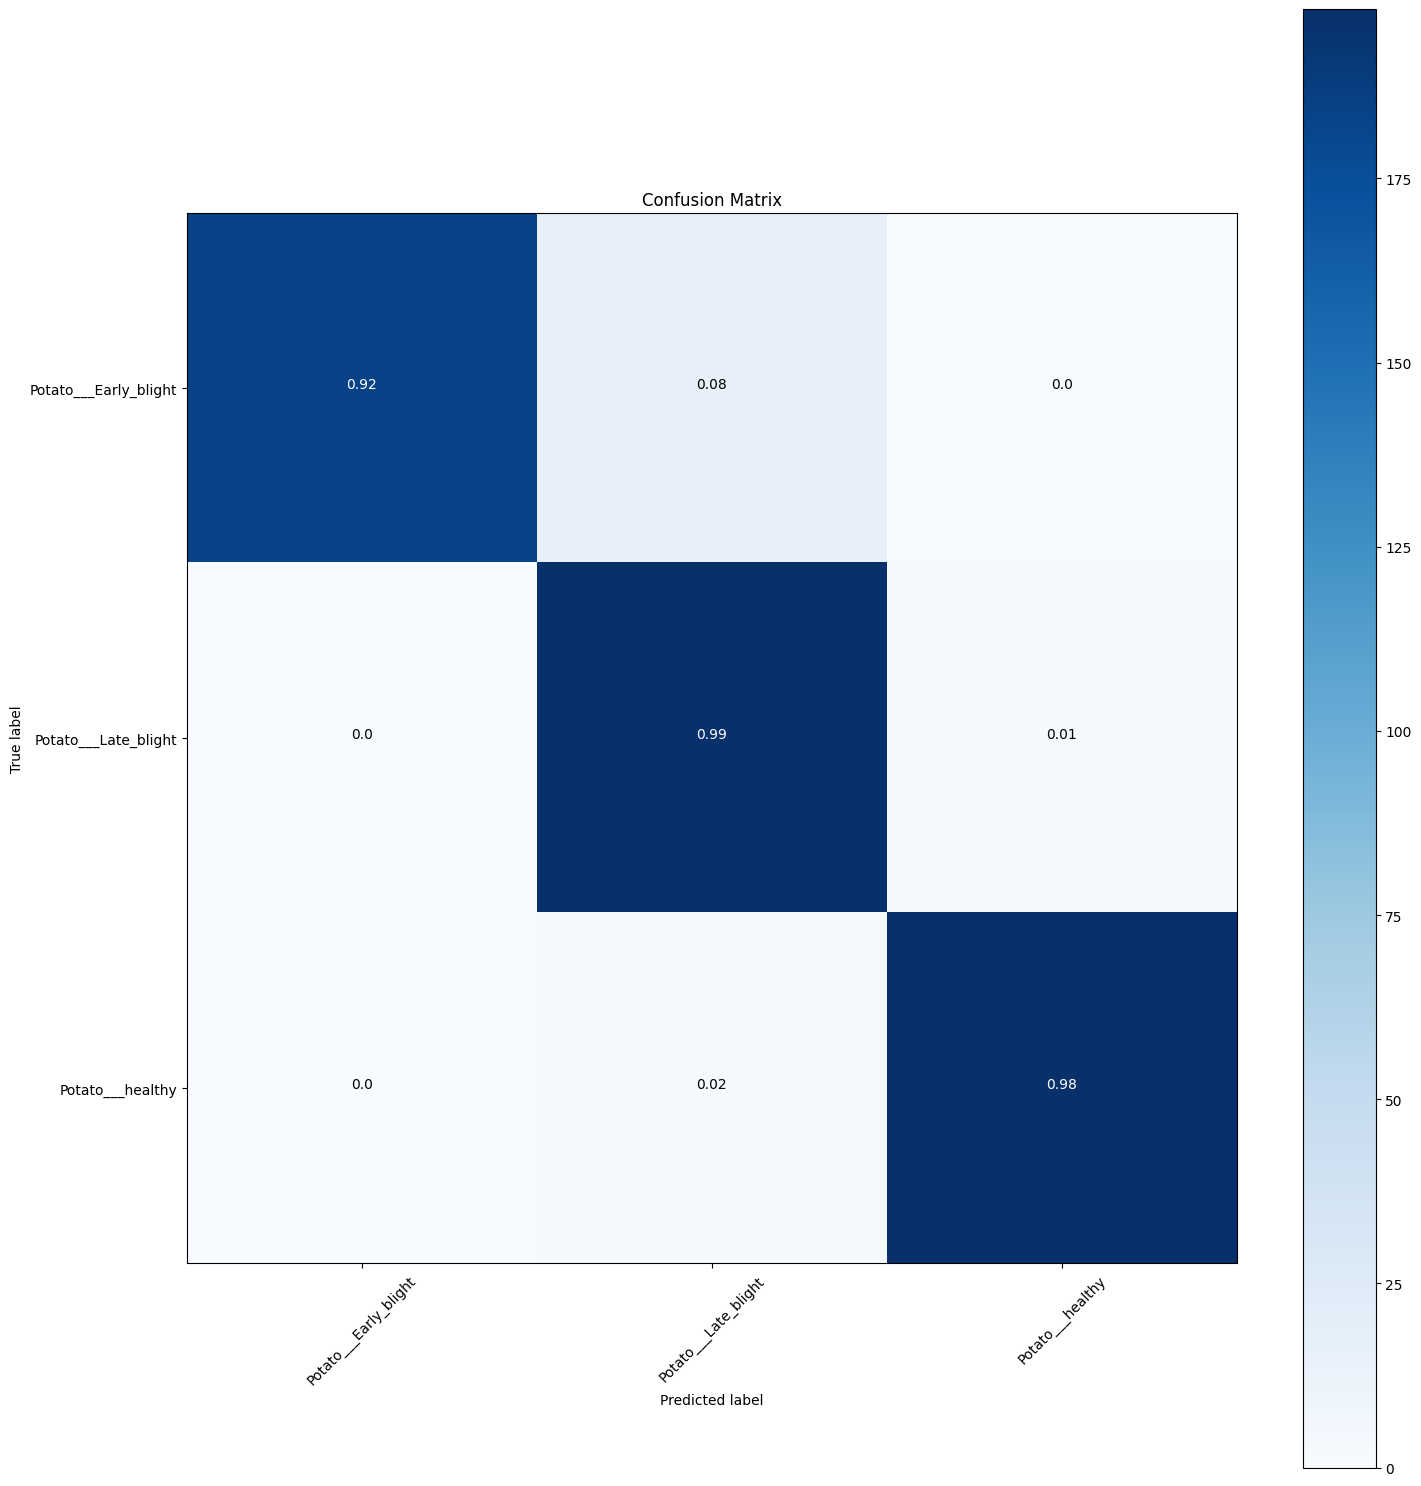

In [38]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [17]:
import numpy as np

<ipython-input-41-dc00a1be930d>:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_generator)


Confusion Matrix
Classification Report
                       precision    recall  f1-score   support

Potato___Early_blight       0.99      0.90      0.94       200
 Potato___Late_blight       0.90      0.99      0.94       200
     Potato___healthy       1.00      0.98      0.99       200

             accuracy                           0.96       600
            macro avg       0.96      0.96      0.96       600
         weighted avg       0.96      0.96      0.96       600



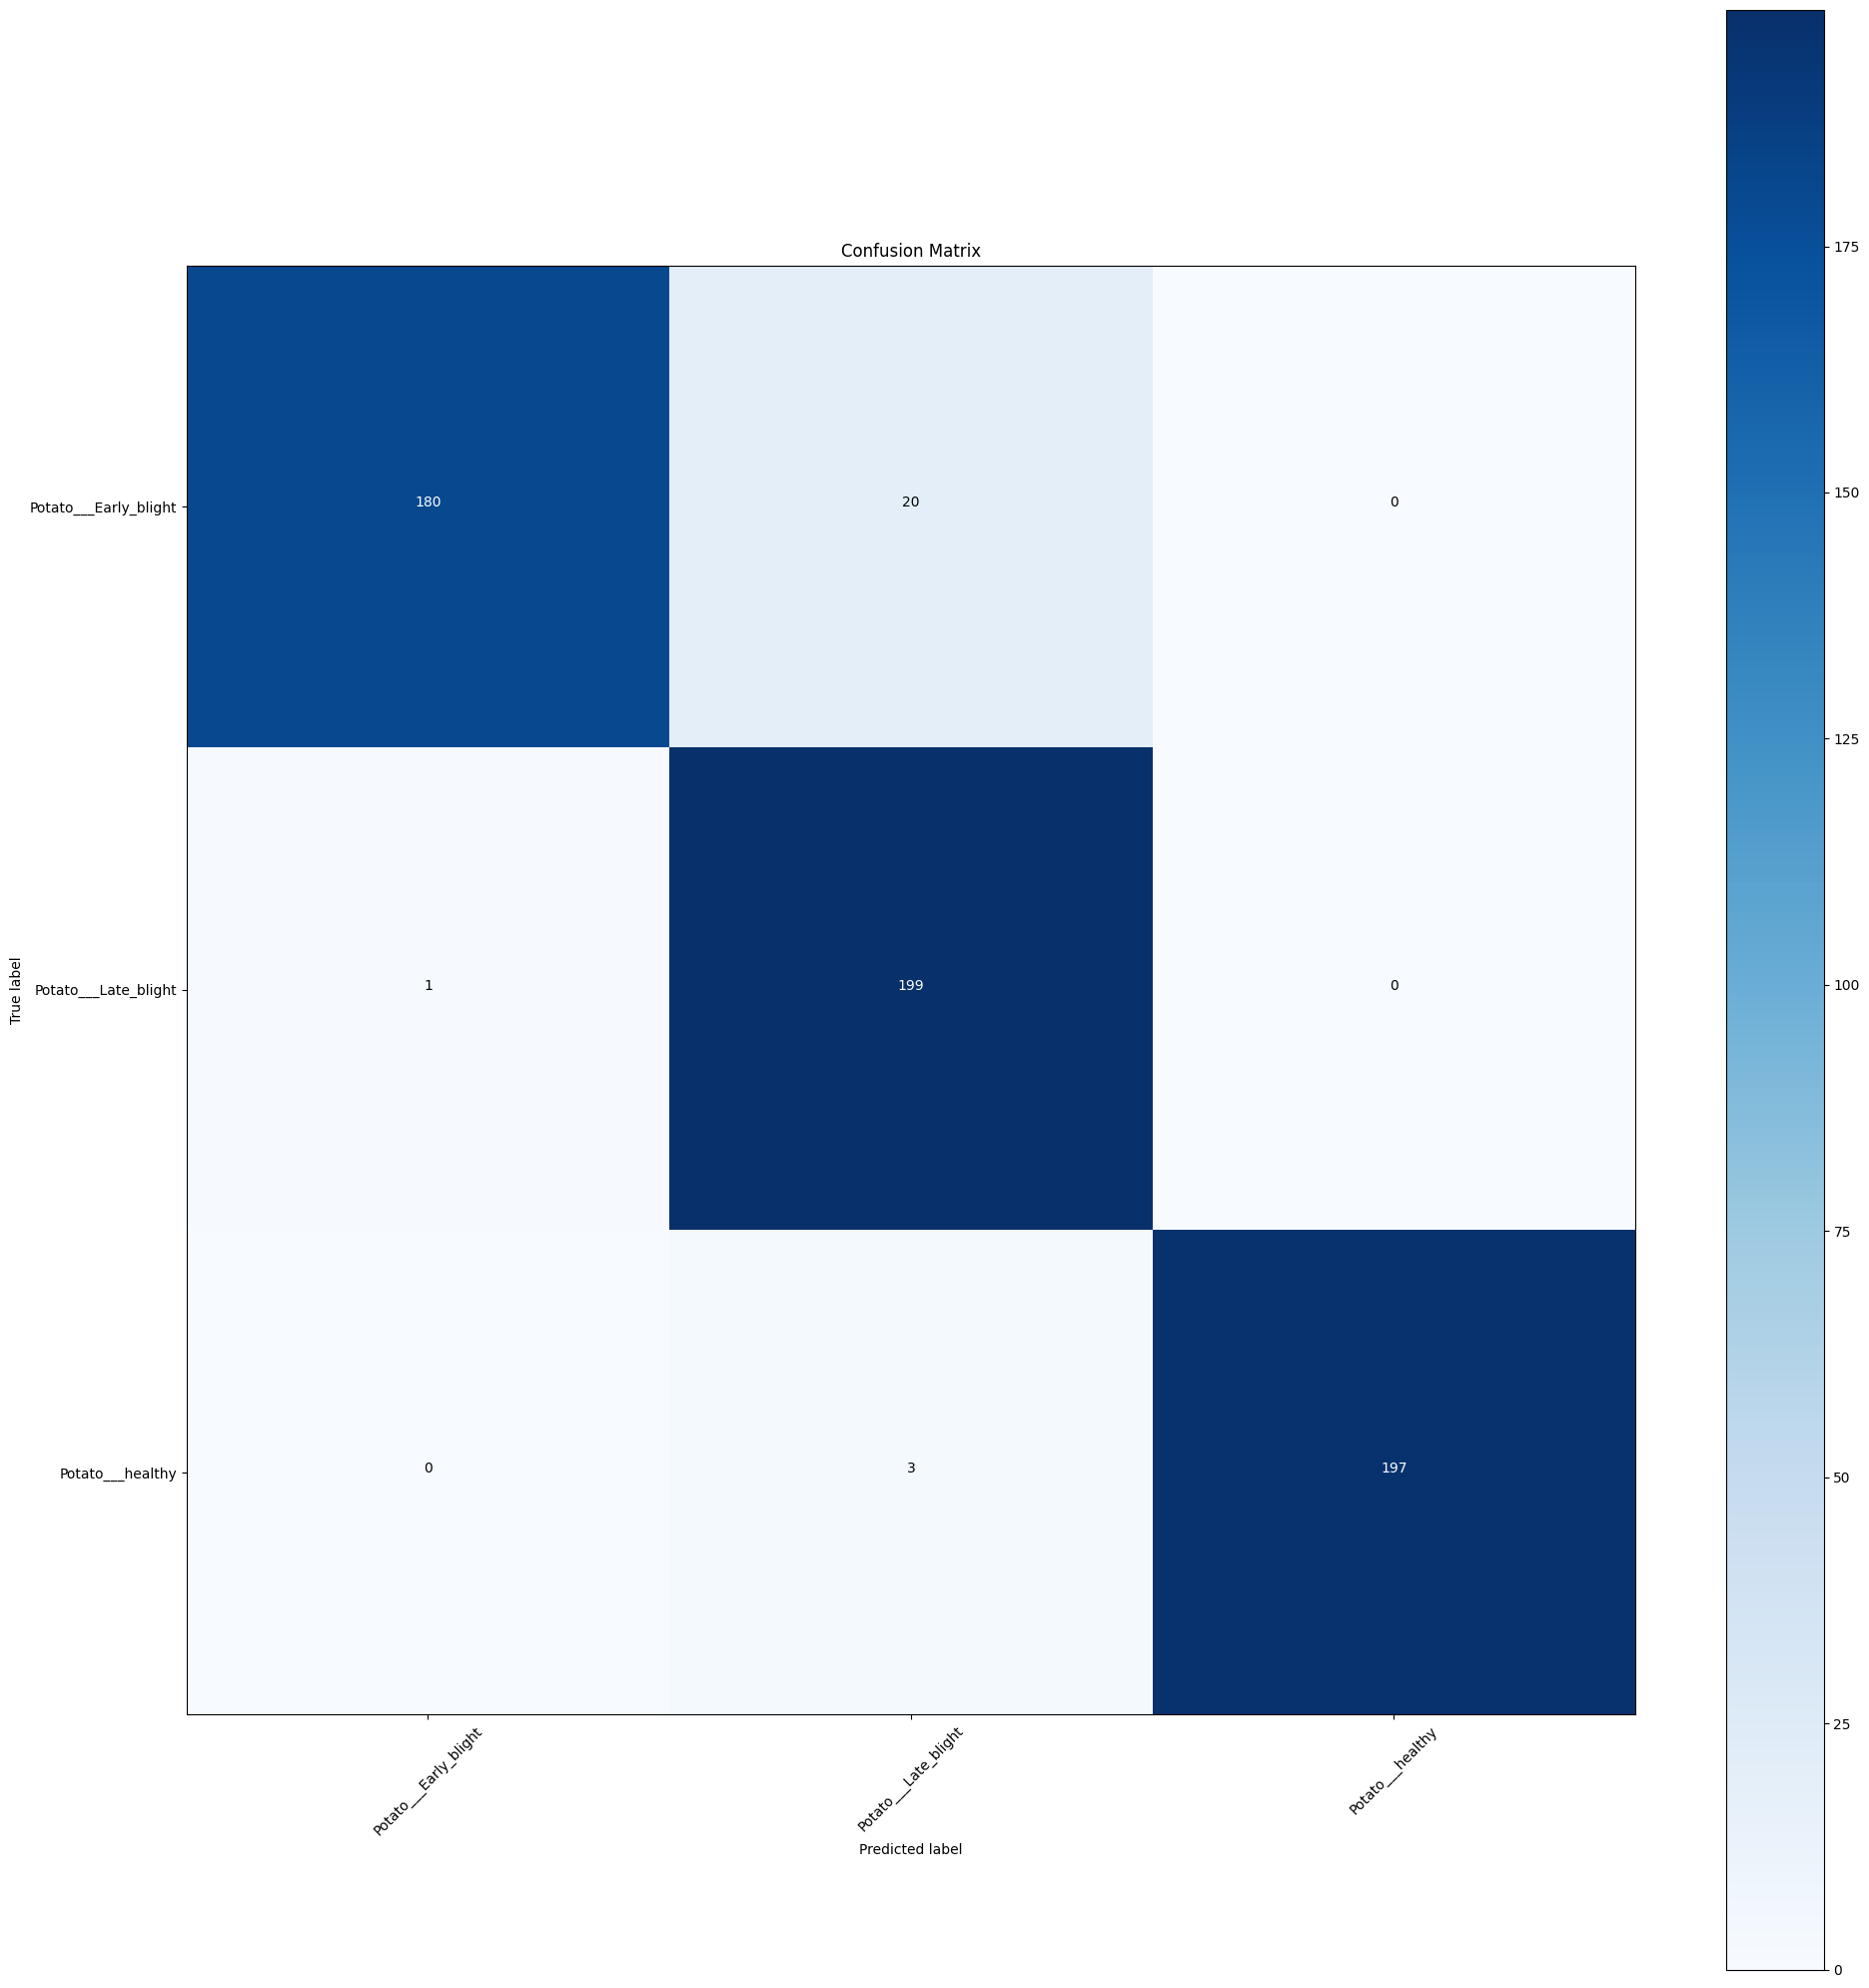

In [41]:
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)
# print(target_names)
#Confusion Matrix
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [19]:
y_true=test_generator.classes

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np
#get classification report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       200
           1       0.92      0.99      0.96       200
           2       1.00      1.00      1.00       200

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [24]:
#get confusion matrix
print(confusion_matrix(y_true,y_pred))

[[183  17   0]
 [  1 199   0]
 [  0   0 200]]


In [42]:
import seaborn as sns
order=['POTATO EARLY BLIGHT','POTATO LATE BLIGHT','HEALTHY']

In [53]:
unique_elements_train,counts_train=np.unique(train_generator.classes,return_counts=True)
counts_train

array([700, 700, 700])

In [54]:
unique_elements_val,counts_val=np.unique(validation_generator.classes,return_counts=True)
counts_val

array([100, 100, 100])

In [55]:
unique_elements_test,counts_test=np.unique(test_generator.classes,return_counts=True)
counts_test

array([200, 200, 200])

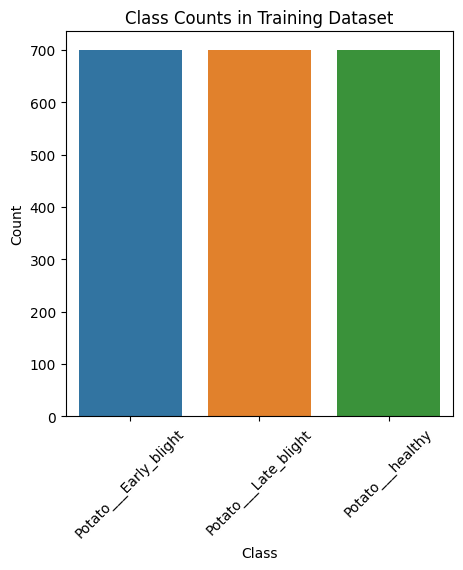

In [56]:
plt.figure(figsize=(5, 5))
sns.barplot(x=class_names, y=counts_train)
plt.title('Class Counts in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

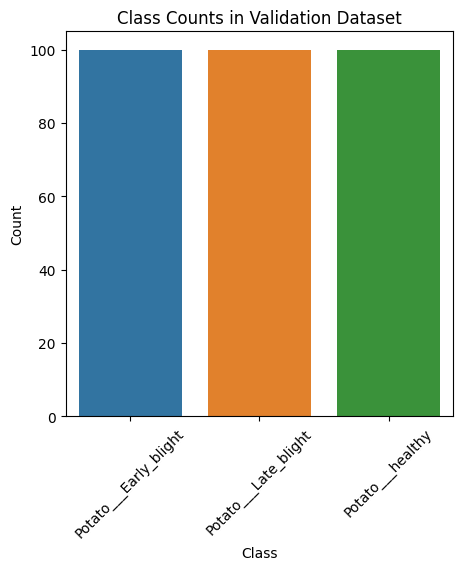

In [58]:
plt.figure(figsize=(5, 5))
sns.barplot(x=class_names, y=counts_val)
plt.title('Class Counts in Validation Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

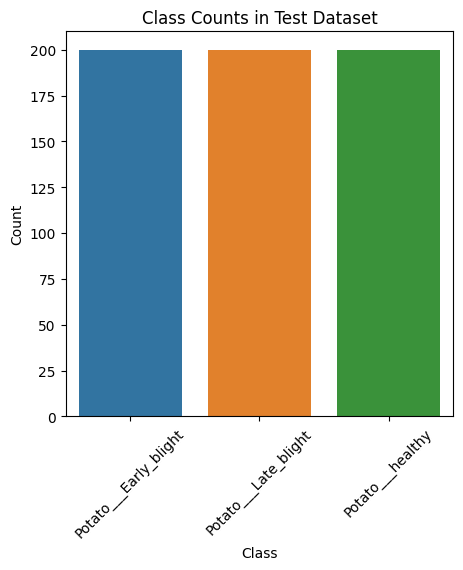

In [59]:
plt.figure(figsize=(5, 5))
sns.barplot(x=class_names, y=counts_test)
plt.title('Class Counts in Test Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
y_pred1 = model.predict(test_generator)

19/19 [==============================] - 13s 662ms/step


In [33]:
y_probs=y_pred1/np.sum(y_pred1,axis=1,keepdims=True)

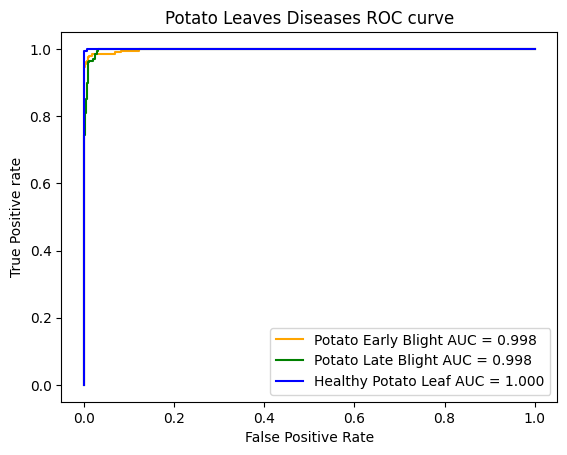

In [37]:
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}
roc_auc={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, y_probs[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
      
plt.plot(fpr[0], tpr[0], color='orange',label='Potato Early Blight AUC = %0.3f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='green',label='Potato Late Blight AUC = %0.3f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',label='Healthy Potato Leaf AUC = %0.3f' % roc_auc[2])
plt.title('Potato Leaves Diseases ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')